# Analyse Stock Price Data of a selected Timeframe

## Install TA-Lib

In [1]:
# conda install -c conda-forge ta-lib

In [2]:
# !pip install yfinance
# !pip install TA-Lib
# !pip install fredapi
# !pip install yahooquery
# !pip install yahoo_fin

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import yahooquery as yq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

In [4]:
start_date = dt.datetime(2013, 3, 1).date()
end_date = dt.datetime(2023, 3, 1).date()
ticker = 'X'
data = yf.download(ticker, start_date, end_date)
data.index = data.index.date
data

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
2013-03-01  20.600000  20.639999  20.100000  20.309999  18.659971  8068700
2013-03-04  20.350000  20.360001  19.760000  20.030001  18.402721  7363700
2013-03-05  20.299999  20.590000  19.930000  19.990000  18.365969  6811700
2013-03-06  20.120001  20.820000  20.080000  20.760000  19.073408  7037300
2013-03-07  20.770000  21.150000  20.650000  20.670000  18.990725  6033300
...               ...        ...        ...        ...        ...      ...
2023-02-22  28.190001  28.760000  27.850000  28.389999  28.389999  6335000
2023-02-23  28.570000  28.750000  27.799999  28.309999  28.309999  4881100
2023-02-24  27.570000  28.309999  27.400000  28.270000  28.270000  5297700
2023-02-27  28.420000  29.370001  28.420000  28.910000  28.910000  6213700
2023-02-28  29.180000  30.850000  28.969999  30.629999  30.629999  9773400

[2517 rows x 6 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2013-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6+ KB


In [6]:
data.describe().applymap("{0:.5f}".format).T

count            mean            std            min  \
Open       2517.00000        22.28506        8.65417        4.80000   
High       2517.00000        22.78596        8.79190        5.34000   
Low        2517.00000        21.79024        8.49412        4.54000   
Close      2517.00000        22.27559        8.63797        4.90000   
Adj Close  2517.00000        21.38543        8.25980        4.81437   
Volume     2517.00000  12834287.56456  7703777.49017  2723700.00000   

                     25%             50%             75%              max  
Open            16.83000        22.61000        27.29000         45.86000  
High            17.22000        23.19000        27.67000         47.64000  
Low             16.42000        22.06000        26.75000         45.20000  
Close           16.80000        22.63000        27.18000         46.01000  
Adj Close       15.98257        21.85927        26.01363         44.34982  
Volume     7602000.00000  10990500.00000  15977700.00000  101142600.00000

#### Add simple moving average of 30 days and exponential moving average of smoothing constant at $\alpha$ = 0.3

In [7]:
data['30MA'] = data['Close'].rolling(window=30).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data.tail()

Open       High        Low      Close  Adj Close   Volume  \
2023-02-22  28.190001  28.760000  27.850000  28.389999  28.389999  6335000   
2023-02-23  28.570000  28.750000  27.799999  28.309999  28.309999  4881100   
2023-02-24  27.570000  28.309999  27.400000  28.270000  28.270000  5297700   
2023-02-27  28.420000  29.370001  28.420000  28.910000  28.910000  6213700   
2023-02-28  29.180000  30.850000  28.969999  30.629999  30.629999  9773400   

                 30MA     50MA     200MA    EMA_0.3  
2023-02-22  28.581667  27.3426  23.40480  28.622404  
2023-02-23  28.602333  27.4006  23.41025  28.528682  
2023-02-24  28.626000  27.4498  23.42210  28.451078  
2023-02-27  28.630667  27.5126  23.43895  28.588754  
2023-02-28  28.706667  27.6340  23.46850  29.201128

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data = pd.read_csv("TSLA.csv", parse_dates=True)

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, row_width=[1.7, 1.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"), row=1, col=1)

# Plot volume on 2nd row
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name="volume"), row=2, col=1)

fig.add_trace(go.Scatter(x=data.index,
                y=data["30MA"],
                name="30MA",
                opacity=0.7,
                line=dict(color='orange', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["50MA"],
                name="50MA",
                opacity=0.7,
                line=dict(color='green', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["200MA"],
                name="200MA",
                opacity=0.7,
                line=dict(color='red', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["EMA_0.3"],
                name="EMA_0.3",
                opacity=0.7,
                line=dict(color='blue', width=2),
                ))

# Show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

#### We can see that the daily returns are random and normally distributed as shown by the 2 graphs below.

<AxesSubplot:>

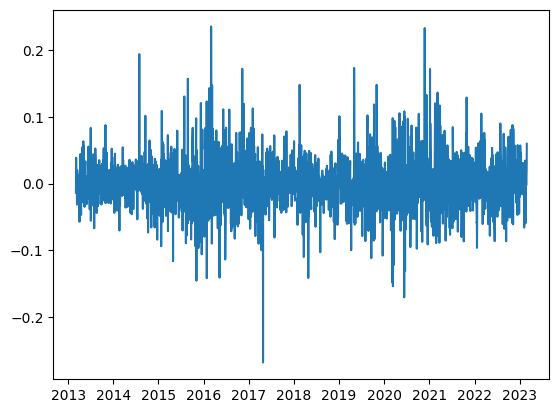

In [9]:
daily_returns = data.Close.pct_change()
daily_returns.plot()

Text(0, 0.5, 'Counts')

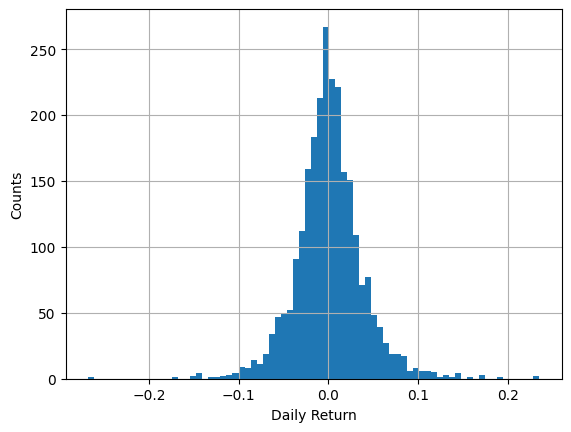

In [10]:

daily_returns.hist(bins=75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

#### Analysis of Close Price based on Year, Quarter, Month & Week

In [11]:
data.index = pd.to_datetime(data.index)
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data.head(10)

Close
2013-03-31  20.095500
2013-04-30  17.221364
2013-05-31  18.357727
2013-06-30  17.460500
2013-07-31  18.331818
2013-08-31  18.170455
2013-09-30  20.098500
2013-10-31  22.863043
2013-11-30  27.026500
2013-12-31  27.730476

In [12]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data.head(10)

Close  Year      Month  dayofweek  quarter
2013-03-31  20.095500  2013      March     Sunday        1
2013-04-30  17.221364  2013      April    Tuesday        2
2013-05-31  18.357727  2013        May     Friday        2
2013-06-30  17.460500  2013       June     Sunday        2
2013-07-31  18.331818  2013       July  Wednesday        3
2013-08-31  18.170455  2013     August   Saturday        3
2013-09-30  20.098500  2013  September     Monday        3
2013-10-31  22.863043  2013    October   Thursday        4
2013-11-30  27.026500  2013   November   Saturday        4
2013-12-31  27.730476  2013   December    Tuesday        4

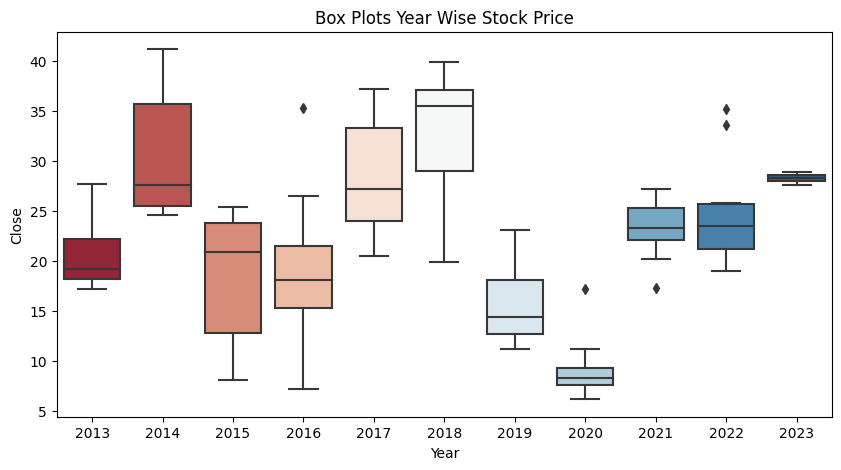

In [13]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise Stock Price')
plt.style.context('fivethirtyeight')

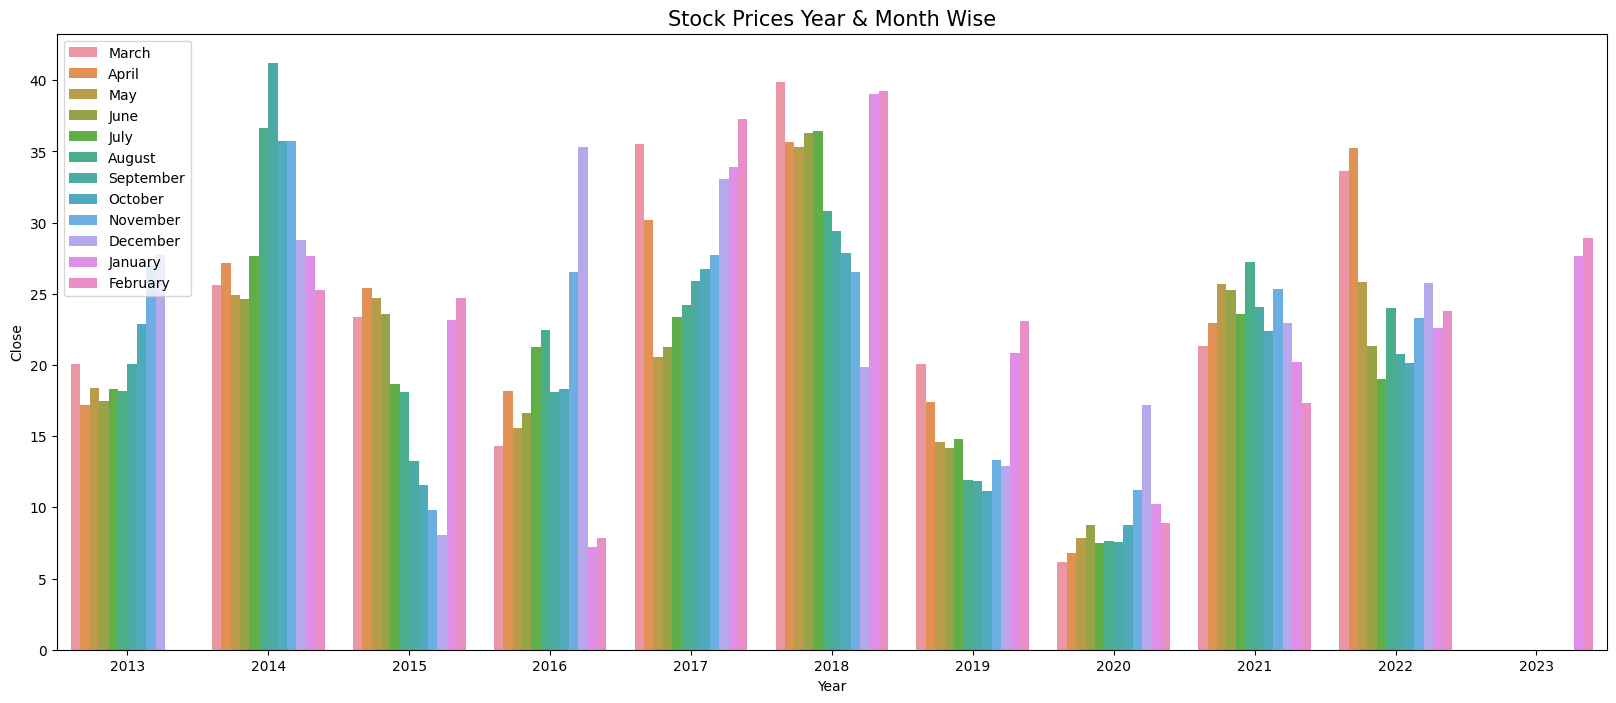

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

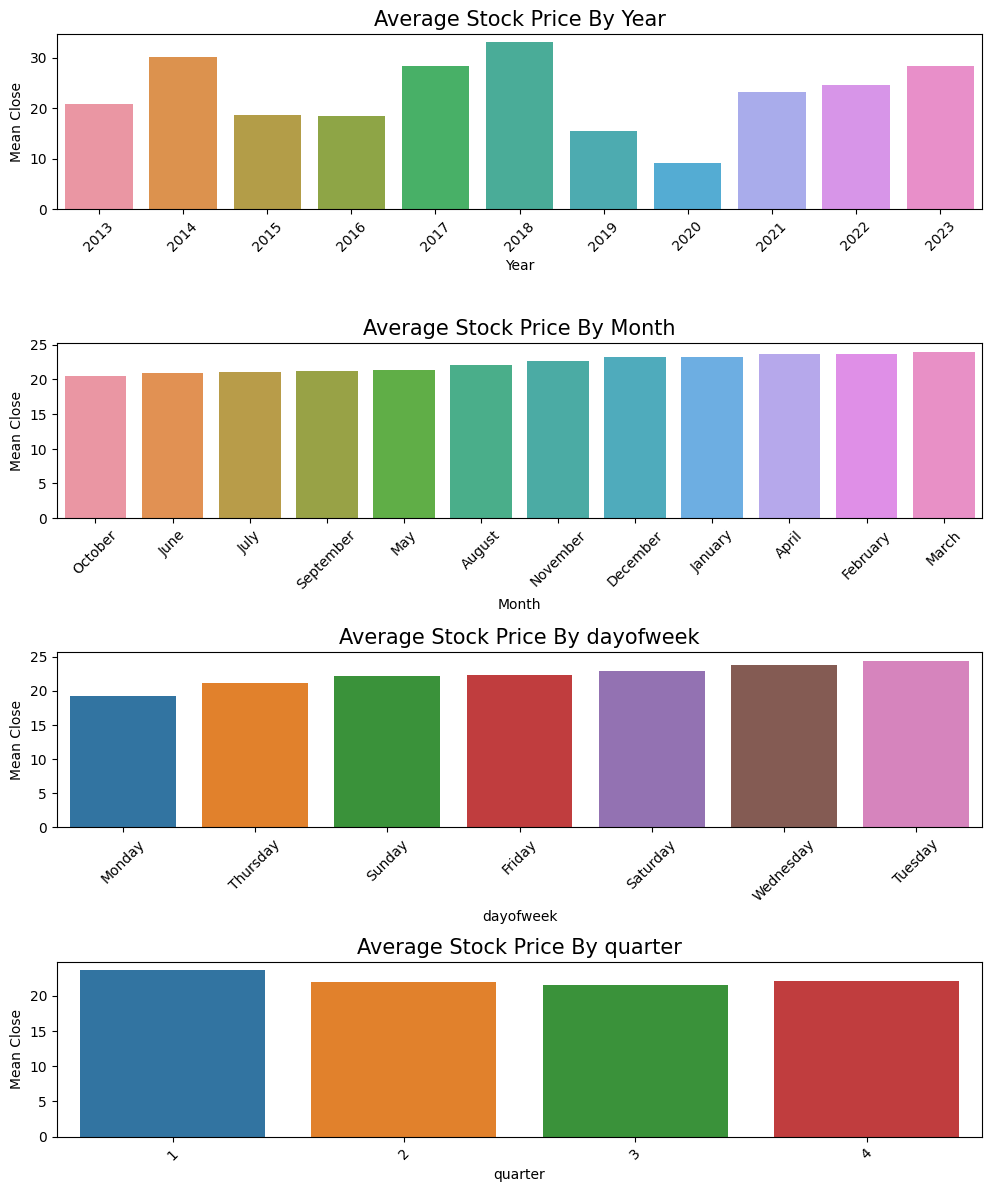

In [15]:
fig = plt.figure(figsize=(10,8))
fig.set_size_inches(10,12)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## We will only use certain indicators from the original dataset

In [16]:
stockCloseVolume = data.drop(columns=["Open", "High", "Low", "Adj Close", "200MA"]).copy()
stockCloseVolume

Close   Volume       30MA     50MA    EMA_0.3
2013-03-01  20.309999  8068700        NaN      NaN  20.309999
2013-03-04  20.030001  7363700        NaN      NaN  20.226000
2013-03-05  19.990000  6811700        NaN      NaN  20.155200
2013-03-06  20.760000  7037300        NaN      NaN  20.336640
2013-03-07  20.670000  6033300        NaN      NaN  20.436648
...               ...      ...        ...      ...        ...
2023-02-22  28.389999  6335000  28.581667  27.3426  28.622404
2023-02-23  28.309999  4881100  28.602333  27.4006  28.528682
2023-02-24  28.270000  5297700  28.626000  27.4498  28.451078
2023-02-27  28.910000  6213700  28.630667  27.5126  28.588754
2023-02-28  30.629999  9773400  28.706667  27.6340  29.201128

[2517 rows x 5 columns]

### Retrieve from FRED Database (US Economics and market data)

In [17]:
# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='47bd175ac2732acae3621b3c48848ff4')

# Retrieve daily close price of stock market indexes

sp500 = fred.get_series('SP500', observation_start = start_date, 
                        observation_end = end_date)

#Dow Jones Composite Average
djca = fred.get_series('DJCA', observation_start = start_date, 
                       observation_end = end_date) 

treasury_10y = fred.get_series('DGS10', observation_start = start_date, 
                               observation_end = end_date)

marketData = pd.DataFrame({'S&P500': sp500, 'DowJones': djca,
                        '10Y_Treasury_Rate': treasury_10y})

marketData = marketData.dropna()

marketData

S&P500  DowJones  10Y_Treasury_Rate
2013-03-28  1569.19   5036.94               1.87
2013-04-01  1562.17   5011.37               1.86
2013-04-02  1570.25   5011.22               1.88
2013-04-03  1553.69   4968.36               1.83
2013-04-04  1559.98   4987.32               1.78
...             ...       ...                ...
2023-02-23  4012.32  11180.26               3.88
2023-02-24  3970.04  11095.39               3.95
2023-02-27  3982.24  11141.21               3.92
2023-02-28  3970.15  11048.13               3.92
2023-03-01  3951.39  11031.18               4.01

[2480 rows x 3 columns]

In [18]:
combined_data = pd.concat([stockCloseVolume, marketData], axis=1).ffill()
combined_data

Close     Volume       30MA     50MA    EMA_0.3   S&P500  \
2013-03-01  20.309999  8068700.0        NaN      NaN  20.309999      NaN   
2013-03-04  20.030001  7363700.0        NaN      NaN  20.226000      NaN   
2013-03-05  19.990000  6811700.0        NaN      NaN  20.155200      NaN   
2013-03-06  20.760000  7037300.0        NaN      NaN  20.336640      NaN   
2013-03-07  20.670000  6033300.0        NaN      NaN  20.436648      NaN   
...               ...        ...        ...      ...        ...      ...   
2023-02-23  28.309999  4881100.0  28.602333  27.4006  28.528682  4012.32   
2023-02-24  28.270000  5297700.0  28.626000  27.4498  28.451078  3970.04   
2023-02-27  28.910000  6213700.0  28.630667  27.5126  28.588754  3982.24   
2023-02-28  30.629999  9773400.0  28.706667  27.6340  29.201128  3970.15   
2023-03-01  30.629999  9773400.0  28.706667  27.6340  29.201128  3951.39   

            DowJones  10Y_Treasury_Rate  
2013-03-01       NaN                NaN  
2013-03-04       NaN                NaN  
2013-03-05       NaN                NaN  
2013-03-06       NaN                NaN  
2013-03-07       NaN                NaN  
...              ...                ...  
2023-02-23  11180.26               3.88  
2023-02-24  11095.39               3.95  
2023-02-27  11141.21               3.92  
2023-02-28  11048.13               3.92  
2023-03-01  11031.18               4.01  

[2518 rows x 8 columns]

## TA-Lib Technical Indicators

In [19]:
# Compute the Relative Strength Index (RSI)
rsi = talib.RSI(data['Close'], timeperiod=14)

# Compute the Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute the Upper and Lower Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# Compute Stochastic Oscillator
stochK, stochD = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                  fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3)

# Compute Average Directional Index (ADX)
adx = talib.ADX(data['High'], data['Low'], data['Close'])

# Compute Chaikin Oscillator
chaikin = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'])

# Compute On-Balance Volume (OBV)
obv = talib.OBV(data['Close'], data['Volume'])

# Add the technical indicators to the DataFrame
combined_data['RSI'] = rsi
combined_data['MACD'] = macd
combined_data['MACD_Signal'] = macdsignal
combined_data['MACD_Histogram'] = macdhist
combined_data['Upper_Bollinger_Band'] = upper
combined_data['Middle_Bollinger_Band'] = middle
combined_data['Lower_Bollinger_Band'] = lower
combined_data['Stoch_K'] = stochK
combined_data['Stoch_D'] = stochD
combined_data['ADX'] = adx
combined_data['Chaikin_Osc'] = chaikin
combined_data['OBV'] = obv

combined_data

Close     Volume       30MA     50MA    EMA_0.3   S&P500  \
2013-03-01  20.309999  8068700.0        NaN      NaN  20.309999      NaN   
2013-03-04  20.030001  7363700.0        NaN      NaN  20.226000      NaN   
2013-03-05  19.990000  6811700.0        NaN      NaN  20.155200      NaN   
2013-03-06  20.760000  7037300.0        NaN      NaN  20.336640      NaN   
2013-03-07  20.670000  6033300.0        NaN      NaN  20.436648      NaN   
...               ...        ...        ...      ...        ...      ...   
2023-02-23  28.309999  4881100.0  28.602333  27.4006  28.528682  4012.32   
2023-02-24  28.270000  5297700.0  28.626000  27.4498  28.451078  3970.04   
2023-02-27  28.910000  6213700.0  28.630667  27.5126  28.588754  3982.24   
2023-02-28  30.629999  9773400.0  28.706667  27.6340  29.201128  3970.15   
2023-03-01  30.629999  9773400.0  28.706667  27.6340  29.201128  3951.39   

            DowJones  10Y_Treasury_Rate        RSI      MACD  MACD_Signal  \
2013-03-01       NaN                NaN        NaN       NaN          NaN   
2013-03-04       NaN                NaN        NaN       NaN          NaN   
2013-03-05       NaN                NaN        NaN       NaN          NaN   
2013-03-06       NaN                NaN        NaN       NaN          NaN   
2013-03-07       NaN                NaN        NaN       NaN          NaN   
...              ...                ...        ...       ...          ...   
2023-02-23  11180.26               3.88  49.785672  0.267419     0.446325   
2023-02-24  11095.39               3.95  49.499114  0.218134     0.400687   
2023-02-27  11141.21               3.92  54.055857  0.228089     0.366167   
2023-02-28  11048.13               3.92  63.569626  0.370497     0.367033   
2023-03-01  11031.18               4.01        NaN       NaN          NaN   

            MACD_Histogram  Upper_Bollinger_Band  Middle_Bollinger_Band  \
2013-03-01             NaN                   NaN                    NaN   
2013-03-04             NaN                   NaN                    NaN   
2013-03-05             NaN                   NaN                    NaN   
2013-03-06             NaN                   NaN                    NaN   
2013-03-07             NaN                   NaN                    NaN   
...                    ...                   ...                    ...   
2023-02-23       -0.178906             30.235631                28.8335   
2023-02-24       -0.182553             30.192295                28.7840   
2023-02-27       -0.138078             30.197249                28.7880   
2023-02-28        0.003464             30.506438                28.9020   
2023-03-01             NaN                   NaN                    NaN   

            Lower_Bollinger_Band    Stoch_K    Stoch_D        ADX  \
2013-03-01                   NaN        NaN        NaN        NaN   
2013-03-04                   NaN        NaN        NaN        NaN   
2013-03-05                   NaN        NaN        NaN        NaN   
2013-03-06                   NaN        NaN        NaN        NaN   
2013-03-07                   NaN        NaN        NaN        NaN   
...                          ...        ...        ...        ...   
2023-02-23             27.431369  21.760980  27.504695  19.384198   
2023-02-24             27.375705  27.713350  23.428265  18.288694   
2023-02-27             27.378751  45.464523  31.646284  17.692393   
2023-02-28             27.297562  69.879800  47.685891  18.220369   
2023-03-01                   NaN        NaN        NaN        NaN   

             Chaikin_Osc         OBV  
2013-03-01           NaN   8068700.0  
2013-03-04           NaN    705000.0  
2013-03-05           NaN  -6106700.0  
2013-03-06           NaN    930600.0  
2013-03-07           NaN  -5102700.0  
...                  ...         ...  
2023-02-23  1.082161e+06 -26223400.0  
2023-02-24  2.444088e+06 -31521100.0  
2023-02-27  2.841482e+06 -25307400.0  
2023-02-28  5.127644e+06 -15534000.0  
2023-03-01         

In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-03-01 to 2023-03-01
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  2518 non-null   float64
 1   Volume                 2518 non-null   float64
 2   30MA                   2489 non-null   float64
 3   50MA                   2469 non-null   float64
 4   EMA_0.3                2518 non-null   float64
 5   S&P500                 2499 non-null   float64
 6   DowJones               2499 non-null   float64
 7   10Y_Treasury_Rate      2499 non-null   float64
 8   RSI                    2503 non-null   float64
 9   MACD                   2484 non-null   float64
 10  MACD_Signal            2484 non-null   float64
 11  MACD_Histogram         2484 non-null   float64
 12  Upper_Bollinger_Band   2498 non-null   float64
 13  Middle_Bollinger_Band  2498 non-null   float64
 14  Lower_Bollinger_Band   2498 non-null  

### Remove the null values at the front of the dataset caused by the technical indicators

In [21]:
filtered_data = combined_data[49:-1]
filtered_data

Close     Volume       30MA     50MA    EMA_0.3   S&P500  \
2013-05-10  19.230000  8874100.0  17.505667  18.5416  18.710210  1633.70   
2013-05-13  18.559999  7350200.0  17.500333  18.5066  18.665147  1633.77   
2013-05-14  18.500000  8888400.0  17.528667  18.4760  18.615603  1650.34   
2013-05-15  18.070000  8715300.0  17.549667  18.4376  18.451922  1658.78   
2013-05-16  17.870001  8292800.0  17.560333  18.3798  18.277346  1650.47   
...               ...        ...        ...      ...        ...      ...   
2023-02-22  28.389999  6335000.0  28.581667  27.3426  28.622404  3991.05   
2023-02-23  28.309999  4881100.0  28.602333  27.4006  28.528682  4012.32   
2023-02-24  28.270000  5297700.0  28.626000  27.4498  28.451078  3970.04   
2023-02-27  28.910000  6213700.0  28.630667  27.5126  28.588754  3982.24   
2023-02-28  30.629999  9773400.0  28.706667  27.6340  29.201128  3970.15   

            DowJones  10Y_Treasury_Rate        RSI      MACD  MACD_Signal  \
2013-05-10   5171.51               1.90  62.625727  0.135196    -0.212423   
2013-05-13   5153.04               1.92  54.876030  0.152796    -0.139379   
2013-05-14   5209.41               1.96  54.228858  0.160058    -0.079492   
2013-05-15   5239.72               1.94  49.704674  0.129621    -0.037669   
2013-05-16   5211.34               1.87  47.710923  0.088343    -0.012467   
...              ...                ...        ...       ...          ...   
2023-02-22  11134.50               3.93  50.326764  0.322361     0.491052   
2023-02-23  11180.26               3.88  49.785672  0.267419     0.446325   
2023-02-24  11095.39               3.95  49.499114  0.218134     0.400687   
2023-02-27  11141.21               3.92  54.055857  0.228089     0.366167   
2023-02-28  11048.13               3.92  63.569626  0.370497     0.367033   

            MACD_Histogram  Upper_Bollinger_Band  Middle_Bollinger_Band  \
2013-05-10        0.347619             19.355770                17.4240   
2013-05-13        0.292175             19.476643                17.5205   
2013-05-14        0.239549             19.569201                17.6145   
2013-05-15        0.167290             19.565822                17.7050   
2013-05-16        0.100810             19.545005                17.7765   
...                    ...                   ...                    ...   
2023-02-22       -0.168690             30.239251                28.8575   
2023-02-23       -0.178906             30.235631                28.8335   
2023-02-24       -0.182553             30.192295                28.7840   
2023-02-27       -0.138078             30.197249                28.7880   
2023-02-28        0.003464             30.506438                28.9020   

            Lower_Bollinger_Band    Stoch_K    Stoch_D        ADX  \
2013-05-10             15.492230  84.434331  83.266328  27.222479   
2013-05-13             15.564356  63.460119  76.325084  26.663101   
2013-05-14             15.659799  45.008922  64.301124  25.768839   
2013-05-15             15.844178  20.221868  42.896970  24.269301   
2013-05-16             16.007995  15.113241  26.781344  22.668499   
...                          ...        ...        ...        ...   
2023-02-22             27.475750  20.810466  42.051684  20.761793   
2023-02-23             27.431369  21.760980  27.504695  19.384198   
2023-02-24             27.375705  27.713350  23.428265  18.288694   
2023-02-27             27.378751  45.464523  31.646284  17.692393   
2023-02-28             27.297562  69.879800  47.685891  18.220369   

             Chaikin_Osc          OBV  
2013-05-10  6.507101e+06 -118117500.0  
2013-05-13  5.032156e+06 -125467700.0  
2013-05-14  2.750065e+06 -134356100.0  
2013-05-15  4.367112e+05 -143071400.0  
2013-05-16 -1.660351e+06 -151364200.0  
...                  ...          ...  
2023-02-22  1.270731e+06  -21342300.0  
2023-02-23  1.082161e+06  -26223400.0  
2023-02-24  2.444088e+06  -31521100.0  
2023-02-27  2.841482e+06  -25307400.0  
2023-02-

In [22]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2013-05-10 to 2023-02-28
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  2468 non-null   float64
 1   Volume                 2468 non-null   float64
 2   30MA                   2468 non-null   float64
 3   50MA                   2468 non-null   float64
 4   EMA_0.3                2468 non-null   float64
 5   S&P500                 2468 non-null   float64
 6   DowJones               2468 non-null   float64
 7   10Y_Treasury_Rate      2468 non-null   float64
 8   RSI                    2468 non-null   float64
 9   MACD                   2468 non-null   float64
 10  MACD_Signal            2468 non-null   float64
 11  MACD_Histogram         2468 non-null   float64
 12  Upper_Bollinger_Band   2468 non-null   float64
 13  Middle_Bollinger_Band  2468 non-null   float64
 14  Lower_Bollinger_Band   2468 non-null  

In [23]:
filtered_data.describe().applymap("{0:.5f}".format).T

count             mean              std  \
Close                  2468.00000         22.35001          8.70458   
Volume                 2468.00000   12916644.97569    7745104.46553   
30MA                   2468.00000         22.28362          8.47535   
50MA                   2468.00000         22.24554          8.30582   
EMA_0.3                2468.00000         22.33988          8.64713   
S&P500                 2468.00000       2806.39084        863.93217   
DowJones               2468.00000       8104.62135       2055.80968   
10Y_Treasury_Rate      2468.00000          2.18636          0.72363   
RSI                    2468.00000         50.08147         13.65326   
MACD                   2468.00000          0.02929          1.02430   
MACD_Signal            2468.00000          0.02821          0.96961   
MACD_Histogram         2468.00000          0.00108          0.29534   
Upper_Bollinger_Band   2468.00000         24.98763          9.42631   
Middle_Bollinger_Band  2468.00000         22.30723          8.55739   
Lower_Bollinger_Band   2468.00000         19.62682          7.92940   
Stoch_K                2468.00000         49.10202         25.75869   
Stoch_D                2468.00000         49.11029         24.02369   
ADX                    2468.00000         25.87610         10.62017   
Chaikin_Osc            2468.00000   -1582474.65289   10351106.96271   
OBV                    2468.00000  -40799494.77310  161736177.76946   

                                    min               25%              50%  \
Close                           4.90000          16.75500         22.82500   
Volume                    2723700.00000     7667675.00000   11115300.00000   
30MA                            6.05833          17.39942         22.91133   
50MA                            6.64300          16.80730         22.92330   
EMA_0.3                         5.37812          16.99102         22.92616   
S&P500                       1573.09000        2076.26250       2657.71000   
DowJones                     4918.16000        6271.99500       8040.60000   
10Y_Treasury_Rate               0.52000           1.72000          2.25500   
RSI                            15.41643          40.55377         50.17682   
MACD                           -3.29382          -0.57361          0.01285   
MACD_Signal                    -3.05849          -0.55725         -0.00430   
MACD_Histogram                 -1.11696          -0.15820          0.01722   
Upper_Bollinger_Band            6.66179          19.22976         25.75014   
Middle_Bollinger_Band           5.76350          17.37838         23.03625   
Lower_Bollinger_Band            4.07842          14.39932         19.99378   
Stoch_K                         0.30973          26.31555         49.48439   
Stoch_D                         4.23081          27.93032         49.19285   
ADX                             8.96766          18.03732         23.36525   
Chaikin_Osc             -40951576.56806    -7199503.95848   -1078921.65629   
OBV                    -435974400.00000  -132805900.00000  -44522650.00000   

                                  75%              max  
Close                        27.27250         46.01000  
Volume                 16142475.00000  101142600.00000  
30MA                         26.93225         41.22300  
50MA                         26.69745         40.14700  
EMA_0.3                      27.13769         44.91406  
S&P500                     3381.09750       4796.56000  
DowJones                   9490.42750      12360.33000  
10Y_Treasury_Rate             2.69000          4.25000  
RSI                          59.34720         87.78994  
MACD                          0.54126          3.72542  
MACD_Signal                   0.52840          3.43629  
MACD_Histogram                0.17906          0.97123  
Upper_Bollinger_Band         29.52686         49.73679  
Middle_Bollinger_Band        27.03112         43.29050  
Lower_Bollinger_Band         24.55032     

<AxesSubplot:>

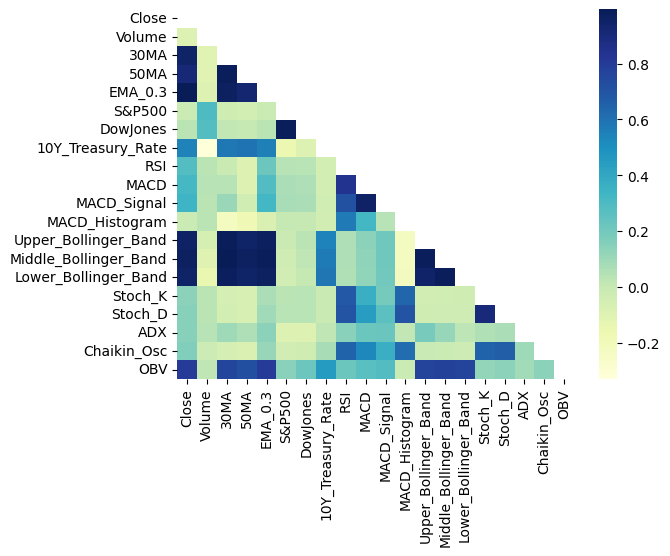

In [24]:
mask = np.triu(np.ones_like(filtered_data.corr()))
sns.heatmap(filtered_data.corr(), mask=mask, cmap="YlGnBu")

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# data['Date'] = pd.to_datetime(data['Date']).astype('int32')
scaler = StandardScaler()

# columns = ['Volume','30MA','50MA','EMA_0.3','S&P500','DowJones','10Y_Treasury_Rate','RSI', 'MACD', 'MACD_Signal','MACD_Histogram',
#            'Upper_Bollinger_Band','Middle_Bollinger_Band','Lower_Bollinger_Band',
#            'Stoch_K','Stoch_D','ADX','Chaikin_Osc','OBV']
# X = filtered_data[columns]
X = filtered_data.drop(columns=["Close"]).copy()
X = scaler.fit_transform(X)

y = pd.DataFrame(filtered_data['Close'])
# y = scaler.fit_transform(y)

print(X.shape)
print(y.shape)

(2468, 19)
(2468, 1)


### Dimensionality Reduction using Principal Component Analysis (PCA)

In [26]:
from sklearn.decomposition import PCA

n_components = len(filtered_data.columns)-1
pca = PCA(n_components = n_components).fit(X)

np.set_printoptions(suppress=True)
np.round(pca.explained_variance_ratio_, 2)

array([0.37, 0.24, 0.12, 0.09, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Especially with time series data, because the sequence of values is important, we do not distribute the dataset into training and test sets in random fashion. Instead, we select an arbitrary split point in the ordered list of observations.

#### Hence, shuffle = False for train_test_split is a very crucial step.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1727, 19)
(1727, 1)
(741, 19)
(741, 1)


In [28]:
def evaluate_model_rmse(model_type, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model = model_type
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    return rmse

evaluate_model_rmse(LinearRegression())

0.7465004041206555

#### Instead of a vanilla linear regression, a comprehensive alternative is to use the LazyRegressor library to demonstrate the efficiency of various ML algorithms with just a few lines of codes.

In [29]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:06<00:00,  4.44s/it]


Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ElasticNetCV                                 1.00       1.00  0.38        0.12
LassoCV                                      1.00       1.00  0.39        0.16
OrthogonalMatchingPursuitCV                  1.00       1.00  0.40        0.04
SGDRegressor                                 1.00       1.00  0.43        0.01
GradientBoostingRegressor                    1.00       1.00  0.43        0.97
HistGradientBoostingRegressor                1.00       1.00  0.45        1.06
LGBMRegressor                                1.00       1.00  0.46        0.10
LarsCV                                       1.00       1.00  0.49        0.11
XGBRegressor                                 1.00       1.00  0.54        0.26
ExtraTreesRegressor                          1.00       1.00  0.55        1.05
RandomForestRegressor                        0.99       0.99  0.56        1.62
HuberRegressor                               0.99       0.99  0.58        0.16
LinearSVR                                    0.99       0.99  0.62        0.09
BaggingRegressor                             0.99       0.99  0.63        0.25
Ridge                                        0.99       0.99  0.67        0.01
LassoLarsIC                                  0.99       0.99  0.70        0.03
RANSACRegressor                              0.99       0.99  0.73        0.04
RidgeCV                                      0.99       0.99  0.74        0.02
LassoLarsCV                                  0.99       0.99  0.74        0.07
BayesianRidge                                0.99       0.99  0.74        0.02
TransformedTargetRegressor                   0.99       0.99  0.75        0.01
LinearRegression                             0.99       0.99  0.75        0.02
OrthogonalMatchingPursuit                    0.99       0.99  0.83        0.01
DecisionTreeRegressor                        0.99       0.99  0.90        0.04
PassiveAggressiveRegressor                   0.98       0.99  0.96        0.01
AdaBoostRegressor                            0.98       0.98  1.01        0.61
Lasso                                        0.98       0.98  1.20        0.03
ElasticNet                                   0.97       0.97  1.35        0.01
TweedieRegressor                             0.97       0.97  1.40        0.02
ExtraTreeRegressor                           0.95       0.95  1.69        0.03
GammaRegressor                               0.76       0.76  3.81        0.02
NuSVR                                        0.75       0.76  3.85        0.26
SVR                                          0.75       0.76  3.85        0.25
PoissonRegressor                             0.51       0.52  5.44        0.03
Lars                                         0.32       0.34  6.38        0.02
KNeighborsRegressor                          0.21       0.24  6.85        0.04
LassoLars                                   -0.18      -0.15  8.41        0.02
DummyRegressor                              -0.18      -0.15  8.41        0.01
QuantileRegressor                           -0.19      -0.16  8.43      175.60
MLPRegressor                                -1.14      -1.08 11.31        2.54
GaussianProcessRegressor                    -6.83      -6.63 21.64        0.51
KernelRidge                                 -7.63      -7.41 22.71        0.22

# Regression & ensemble learning

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [31]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CBR', CatBoostRegressor(silent=True)))
models.append(('MLP', MLPRegressor()))

In [32]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Instead of KFold, TimeSeriesSplit is used due to the sequential nature of the dataset.

In [33]:
model_names, TS_split_results, test_results, train_results = [], [], [], []
num_folds = 5
scoring = 'neg_mean_squared_error'
row_list=[]
# results = pd.DataFrame(columns=['Names','CV_mean','CV_std','Train_RMSE','Test_RMSE'])

print("Model | Mean | Std | Train Results | Test Results")

for name, model in models:
    model_names.append(name)
    TS_split = TimeSeriesSplit(n_splits=num_folds)

    #converted mean square error to positive before converting to RMSE
    cv_results = np.sqrt(-1 * cross_val_score(model, X_train, y_train, cv=TS_split, scoring=scoring))
    TS_split_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(y_train, res.predict(X_train), squared=False)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(y_test, res.predict(X_test), squared=False)
    test_results.append(test_result)

    dict1={'Names':name,'CV_mean':cv_results.mean(),'CV_std':cv_results.std(),'Train_RMSE':train_result,'Test_RMSE':test_result}
    row_list.append(dict1)
    # results.append({'names':[name],'CV_mean':[cv_results.mean()],'CV_std': [cv_results.std()],'train_RMSE': [train_result], 'test_RMSE':[test_result]},ignore_index=True)
    
    model_comparisons = "%s: %f %f %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(model_comparisons)

Model | Mean | Std | Train Results | Test Results
LR: 0.520287 0.113171 0.353436 0.746500
LASSO: 2.611619 1.249348 1.278588 1.187970
RIDGE: 0.500782 0.122183 0.355969 0.556075
EN: 2.905437 1.105756 1.465337 1.442764
KNR: 4.002570 1.739519 0.525652 2.573008
CART: 2.850037 1.986632 0.000000 1.004607
SVR: 4.721567 2.478043 0.703062 2.521306
RFR: 2.562318 2.070983 0.176354 0.573526
BR: 2.623632 2.160569 0.224793 0.615378
ABR: 2.691217 1.908917 0.867121 1.003816
GBR: 2.533408 2.020602 0.263354 0.432384
ETR: 2.810988 2.079217 0.000000 0.540588
XGB: 2.575554 2.096024 0.037002 0.535564
LGBM: 2.777844 2.067257 0.131163 0.447284
CBR: 3.377296 2.249950 0.096595 0.864349
MLP: 6.206105 1.203132 1.097972 8.866867


In [34]:
results = pd.DataFrame(row_list)
results = results.set_index('Names')
results.round(4)
results

CV_mean  CV_std  Train_RMSE  Test_RMSE
Names                                        
LR        0.52    0.11        0.35       0.75
LASSO     2.61    1.25        1.28       1.19
RIDGE     0.50    0.12        0.36       0.56
EN        2.91    1.11        1.47       1.44
KNR       4.00    1.74        0.53       2.57
CART      2.85    1.99        0.00       1.00
SVR       4.72    2.48        0.70       2.52
RFR       2.56    2.07        0.18       0.57
BR        2.62    2.16        0.22       0.62
ABR       2.69    1.91        0.87       1.00
GBR       2.53    2.02        0.26       0.43
ETR       2.81    2.08        0.00       0.54
XGB       2.58    2.10        0.04       0.54
LGBM      2.78    2.07        0.13       0.45
CBR       3.38    2.25        0.10       0.86
MLP       6.21    1.20        1.10       8.87

#### Ensemble learning methods generally outperform regression techniques, with multi-layer preceptron performing the worst when evaluating RMSE.

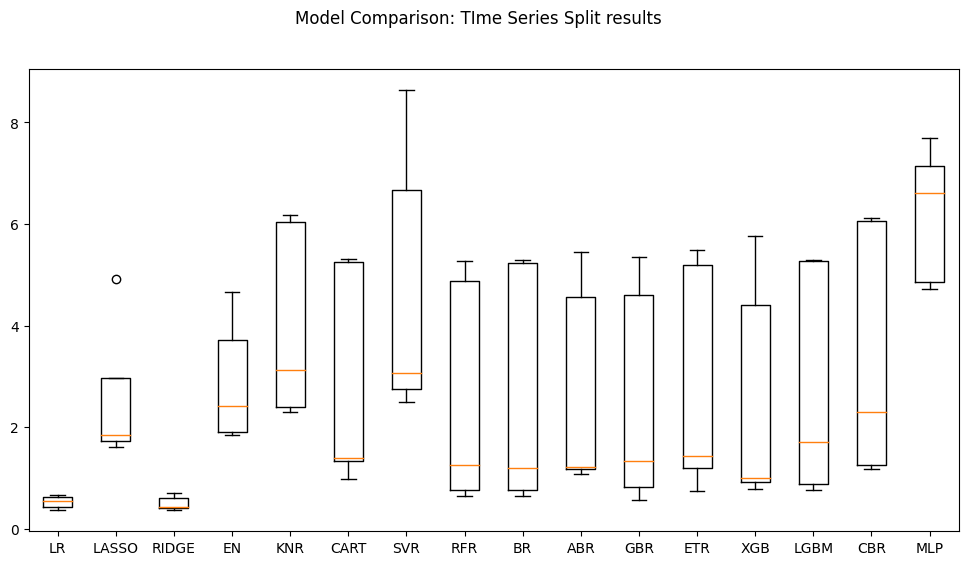

In [35]:
fig = plt.figure()
fig.suptitle('Model Comparison: TIme Series Split results')
ax = fig.add_subplot(111)
plt.boxplot(TS_split_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(12, 6)
plt.show()

In [36]:
def plot_models_RMSE(model_names=model_names, train_results=train_results, test_results=test_results):
    fig = plt.figure()
    ind = np.arange(len(model_names))
    width = 0.1
    ax = fig.add_subplot(111)

    plt.bar(ind - width/2, train_results, width=width, label='Train Error')
    plt.bar(ind + width/2, test_results, width=width, label='Test Error')
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(model_names)
    plt.ylabel('Root Mean Square Error')
    fig.set_size_inches(12, 6)
    plt.show()

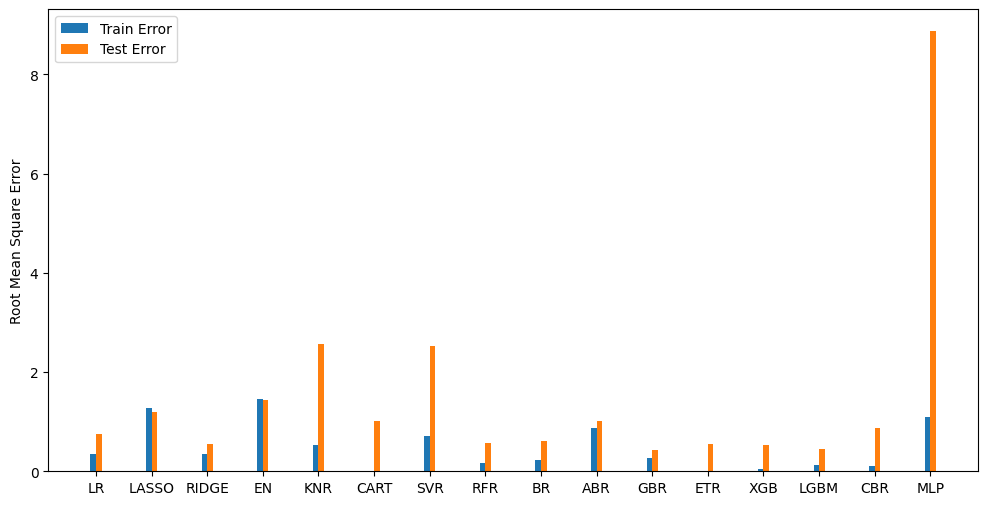

In [37]:
plot_models_RMSE()

# ARIMA

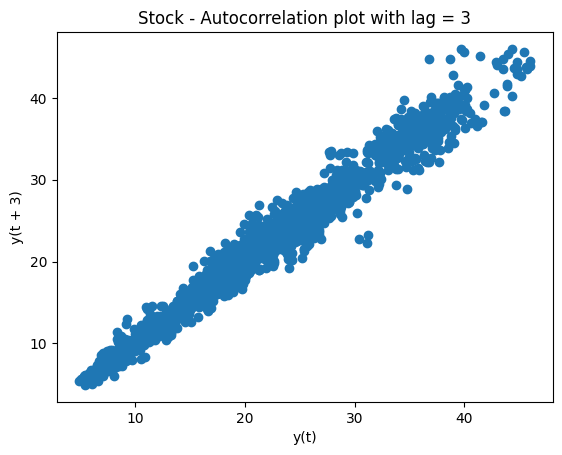

In [38]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data['Close'], lag=3)
plt.title('Stock - Autocorrelation plot with lag = 3')
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [40]:
result = adfuller(y)
print(result,'\n')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("\nReject Ho - Time Series is Stationary")
else:
    print ("\nFailed to Reject Ho - Time Series is Non-Stationary")

(-2.2503345897203486, 0.18848639264653227, 0, 2467, {'1%': -3.4330034727471475, '5%': -2.8627122832725975, '10%': -2.567394052950918}, 5960.531234491991) 

ADF Statistic: -2.2503345897203486
n_lags: 0.18848639264653227
p-value: 0.18848639264653227
Critial Values:
   1%, -3.4330034727471475
Critial Values:
   5%, -2.8627122832725975
Critial Values:
   10%, -2.567394052950918
	1%: -3.433
	5%: -2.863
	10%: -2.567

Failed to Reject Ho - Time Series is Non-Stationary


#### ACF measures the average correlation between data points and their previous values for different lag lengths.
#### PACF is similar to ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

Text(0.5, 0, 'Lags')

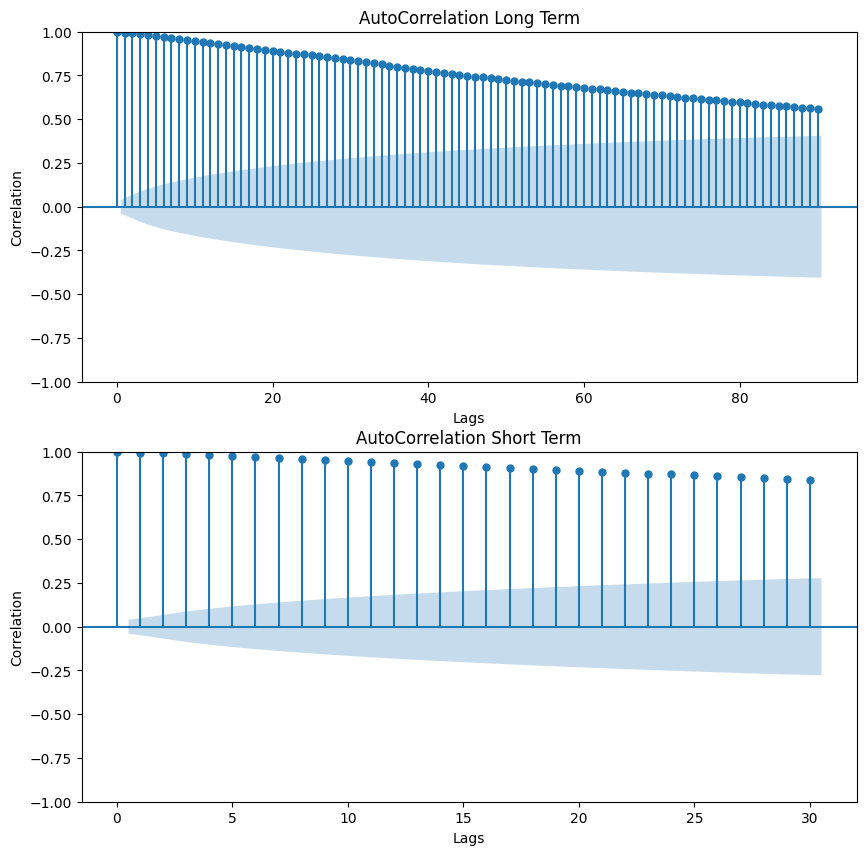

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

acf = plot_acf(data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Text(0.5, 0, 'Lags')

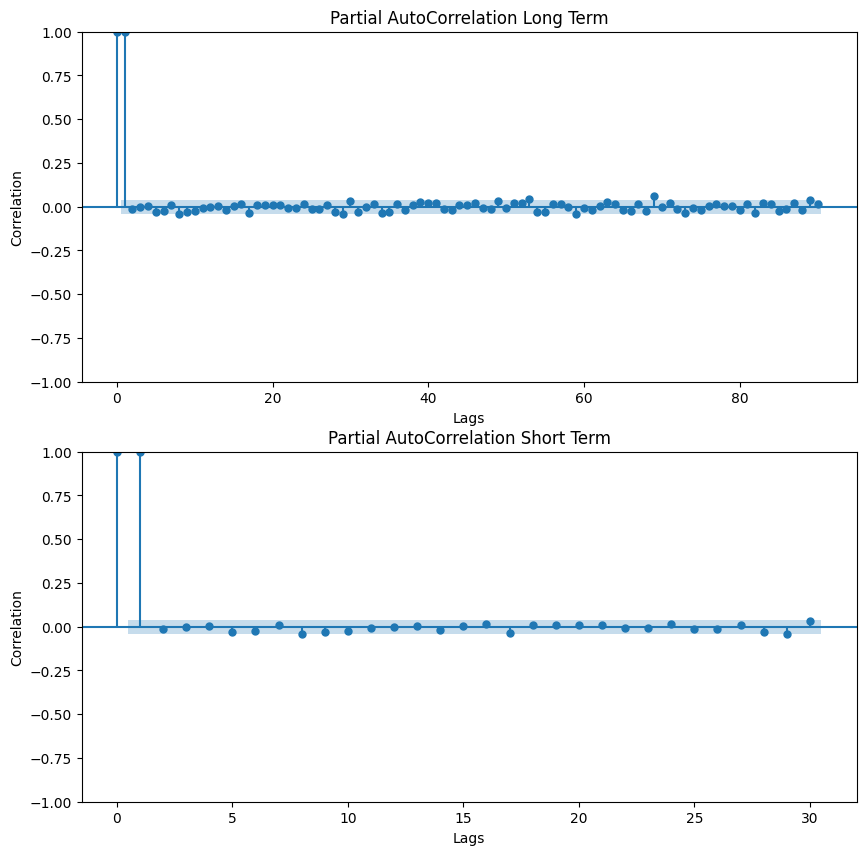

In [42]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

pacf = plot_pacf(data['Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

<Figure size 640x480 with 0 Axes>

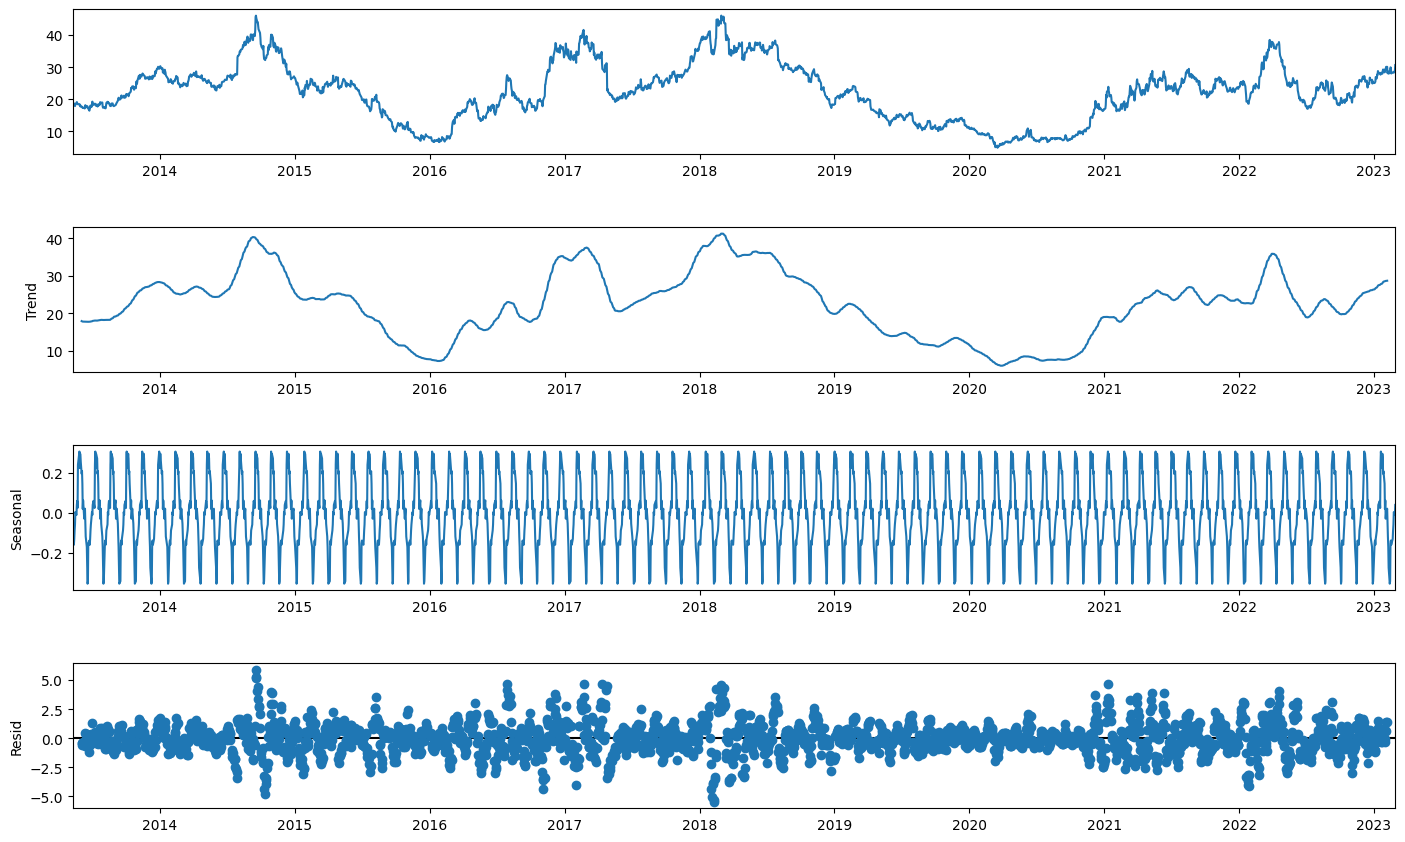

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='addictivee', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [44]:
p = d = q = range(3)
# p = d = range(3)
# q = range(5)
pdq = list(itertools.product(p, d, q))
print(len(pdq))
print(pdq)

27
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.predict(end=len(y_test)-1)
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 8.89423 | Test RMSE: 8.40717
Model (0, 0, 1) | Train RMSE: 4.75275 | Test RMSE: 8.96282
Model (0, 0, 2) | Train RMSE: 2.99272 | Test RMSE: 9.71166
Model (0, 1, 0) | Train RMSE: 0.94303 | Test RMSE: 11.09000
Model (0, 1, 1) | Train RMSE: 0.94303 | Test RMSE: 11.08994
Model (0, 1, 2) | Train RMSE: 0.94302 | Test RMSE: 11.09014
Model (0, 2, 0) | Train RMSE: 1.27585 | Test RMSE: 11.16801
Model (0, 2, 1) | Train RMSE: 0.97574 | Test RMSE: 11.12698
Model (0, 2, 2) | Train RMSE: 0.97574 | Test RMSE: 11.12696
Model (1, 0, 0) | Train RMSE: 0.82194 | Test RMSE: 11.08050
Model (1, 0, 1) | Train RMSE: 0.82193 | Test RMSE: 11.08052
Model (1, 0, 2) | Train RMSE: 0.82194 | Test RMSE: 11.08066
Model (1, 1, 0) | Train RMSE: 0.94303 | Test RMSE: 11.08994
Model (1, 1, 1) | Train RMSE: 0.94303 | Test RMSE: 11.08994
Model (1, 1, 2) | Train RMSE: 0.94302 | Test RMSE: 11.09014
Model (1, 2, 0) | Train RMSE: 1.13330 | Test RMSE: 11.15606
Model (1, 2, 1) | Train RMSE: 0.97574 | Tes

In [47]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.forecast(steps=len(y_test))
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 8.89423 | Test RMSE: 8.40717
Model (0, 0, 1) | Train RMSE: 4.75275 | Test RMSE: 8.38650
Model (0, 0, 2) | Train RMSE: 2.99272 | Test RMSE: 8.37109
Model (0, 1, 0) | Train RMSE: 0.94303 | Test RMSE: 16.86612
Model (0, 1, 1) | Train RMSE: 0.94303 | Test RMSE: 16.86673
Model (0, 1, 2) | Train RMSE: 0.94302 | Test RMSE: 16.86835
Model (0, 2, 0) | Train RMSE: 1.27585 | Test RMSE: 147.00463
Model (0, 2, 1) | Train RMSE: 0.97574 | Test RMSE: 21.79572
Model (0, 2, 2) | Train RMSE: 0.97574 | Test RMSE: 21.77279
Model (1, 0, 0) | Train RMSE: 0.82194 | Test RMSE: 6.89301
Model (1, 0, 1) | Train RMSE: 0.82193 | Test RMSE: 6.89828
Model (1, 0, 2) | Train RMSE: 0.82194 | Test RMSE: 6.82623
Model (1, 1, 0) | Train RMSE: 0.94303 | Test RMSE: 16.86671
Model (1, 1, 1) | Train RMSE: 0.94303 | Test RMSE: 16.86671
Model (1, 1, 2) | Train RMSE: 0.94302 | Test RMSE: 16.86834
Model (1, 2, 0) | Train RMSE: 1.13330 | Test RMSE: 7.86042
Model (1, 2, 1) | Train RMSE: 0.97574 | Test R

In [48]:
train_results.append(ARIMA_train_best)
test_results.append(ARIMA_test_best)
model_names.append("ARIMA")

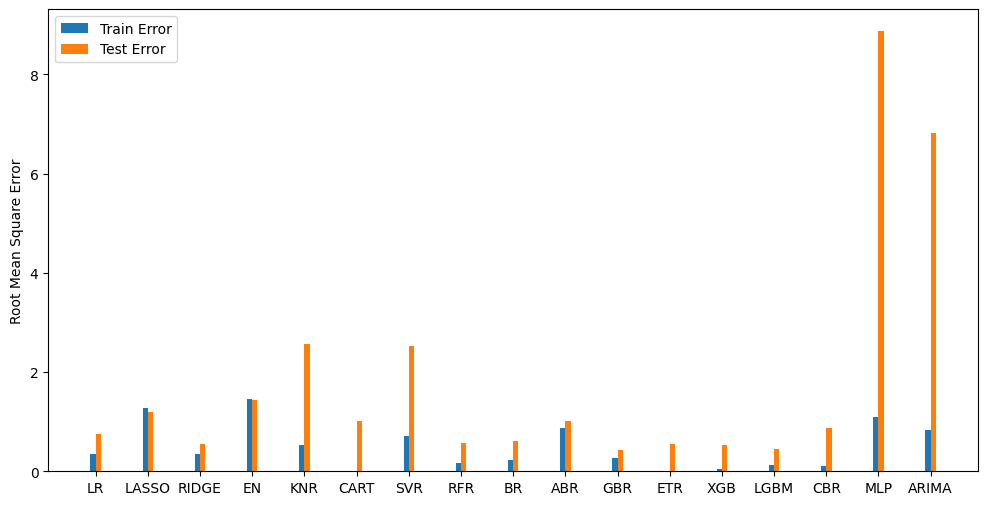

In [49]:
plot_models_RMSE()

#### It can be inferred from the graph above that ARIMA performs worse than ensemble learning methods.

In [50]:
model = ARIMA(y_train, order=best_pdq)
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1727
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2112.714
Date:                Tue, 28 Mar 2023   AIC                           4235.428
Time:                        18:44:27   BIC                           4262.699
Sample:                             0   HQIC                          4245.516
                               - 1727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7042      7.078      2.925      0.003       6.832      34.576
ar.L1          0.9962      0.002    443.344      0.000       0.992       1.001
ma.L1          0.0001      0.023      0.005      0.9

#### Alternatively, the most accurate ARIMA model can be configured below.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4225.100, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4227.094, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4227.095, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4223.267, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4229.095, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.646 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1727
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2110.634
Date:                Tue, 28 Mar 2023   AIC                           4223.267
Time:                        18:44:28   BIC                           4228.721
Sample:                             0   HQIC                          4225.285
                               - 1727                                       

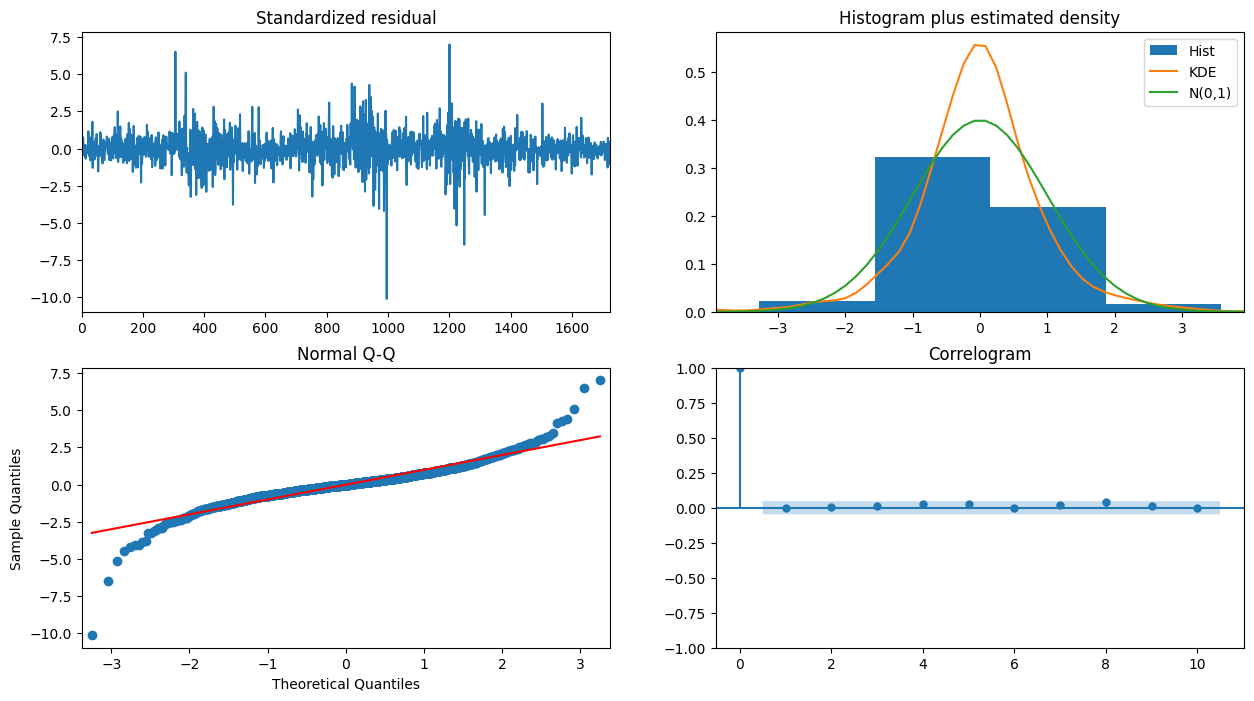

In [51]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# PyTorch LSTM

In [52]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
ClosePrice = pd.DataFrame(data['Close'])

# Create training and testing datasets (70% train & 30% test)
train_split, test_split = train_test_split(ClosePrice, test_size=0.3, shuffle=False)
train = scaler.fit_transform(train_split)
test = scaler.fit_transform(test_split)

print(train.shape)
print(test.shape)

(1761, 1)
(756, 1)


#### For time series in LSTM, a "look back period" can be specified to predict the subsequent timestep value.

In [54]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  (1750, 10)
trainY.shape =  (1750,)
testX.shape =  (745, 10)
testY.shape =  (745,)


#### The values to feed into the LSTM must be converted into tensors beforehand.

In [55]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

# Convert data to PyTorch tensors
trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  torch.Size([1750, 10, 1])
trainY.shape =  torch.Size([1750, 1])
testX.shape =  torch.Size([745, 10, 1])
testY.shape =  torch.Size([745, 1])


In [56]:
input_dim = 1 # The number of expected features in the input x (1 for univariate analysis)
hidden_dim = 50 # The number of features in the hidden state h
num_layers = 3 # Number of recurrent layers to formed a stacked LSTM
output_dim = 1
dropout_prob = 0.1
num_epochs = 100
learning_rate = 0.01

In [57]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob) # bidirectional=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [58]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)

print("Model's state_dict:")
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([200, 1])
lstm.weight_hh_l0 	 torch.Size([200, 50])
lstm.bias_ih_l0 	 torch.Size([200])
lstm.bias_hh_l0 	 torch.Size([200])
lstm.weight_ih_l1 	 torch.Size([200, 50])
lstm.weight_hh_l1 	 torch.Size([200, 50])
lstm.bias_ih_l1 	 torch.Size([200])
lstm.bias_hh_l1 	 torch.Size([200])
lstm.weight_ih_l2 	 torch.Size([200, 50])
lstm.weight_hh_l2 	 torch.Size([200, 50])
lstm.bias_ih_l2 	 torch.Size([200])
lstm.bias_hh_l2 	 torch.Size([200])
fc.weight 	 torch.Size([1, 50])
fc.bias 	 torch.Size([1])


#### Training the LSTM Model

In [59]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

for epoch in range(1, num_epochs+1):
    
    lstm_model.train()
    
    trainY_pred = lstm_model(trainX)
    loss = torch.sqrt(criterion(trainY_pred, trainY))
    hist[epoch-1] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 10/100, Loss: 0.2185
Epoch: 20/100, Loss: 0.1258
Epoch: 30/100, Loss: 0.0654
Epoch: 40/100, Loss: 0.0481
Epoch: 50/100, Loss: 0.0482
Epoch: 60/100, Loss: 0.0444
Epoch: 70/100, Loss: 0.0401
Epoch: 80/100, Loss: 0.0381
Epoch: 90/100, Loss: 0.0341
Epoch: 100/100, Loss: 0.0422


In [60]:
train_actual = pd.DataFrame(scaler.inverse_transform(trainY.detach().numpy()))
print(train_actual.head())
train_pred = pd.DataFrame(scaler.inverse_transform(trainY_pred.detach().numpy()))
print(train_pred.head())

LSTM_train_RMSE = mean_squared_error(train_pred, train_actual, squared=False)
print()
print('LSTM Train RMSE:',LSTM_train_RMSE)

      0
0 16.45
1 16.36
2 15.96
3 15.80
4 16.01
      0
0 17.71
1 17.42
2 17.02
3 16.94
4 16.73

LSTM Train RMSE: 1.4153415


#### Plotting the error loss of all epochs

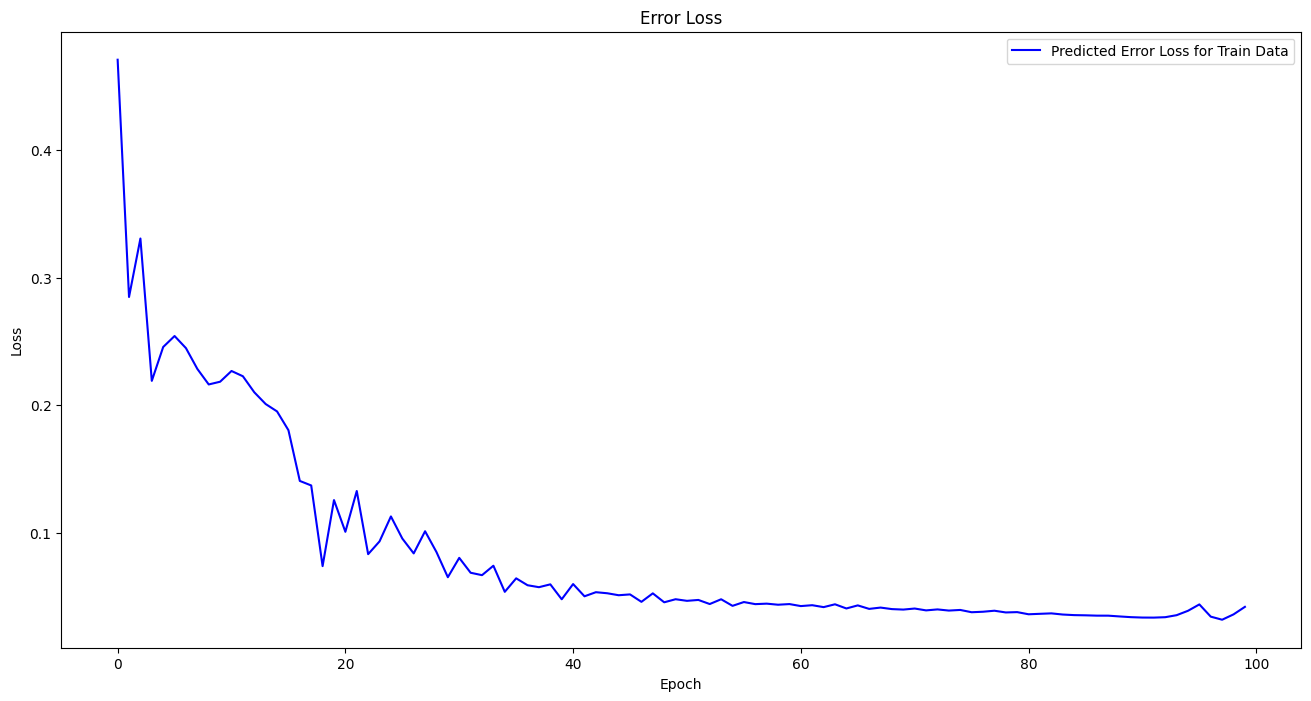

In [61]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(16,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss for Train Data')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the actual and predicted Close Price in the training phase
Accuracy can be improved by tuning the "look back period" specified earlier.

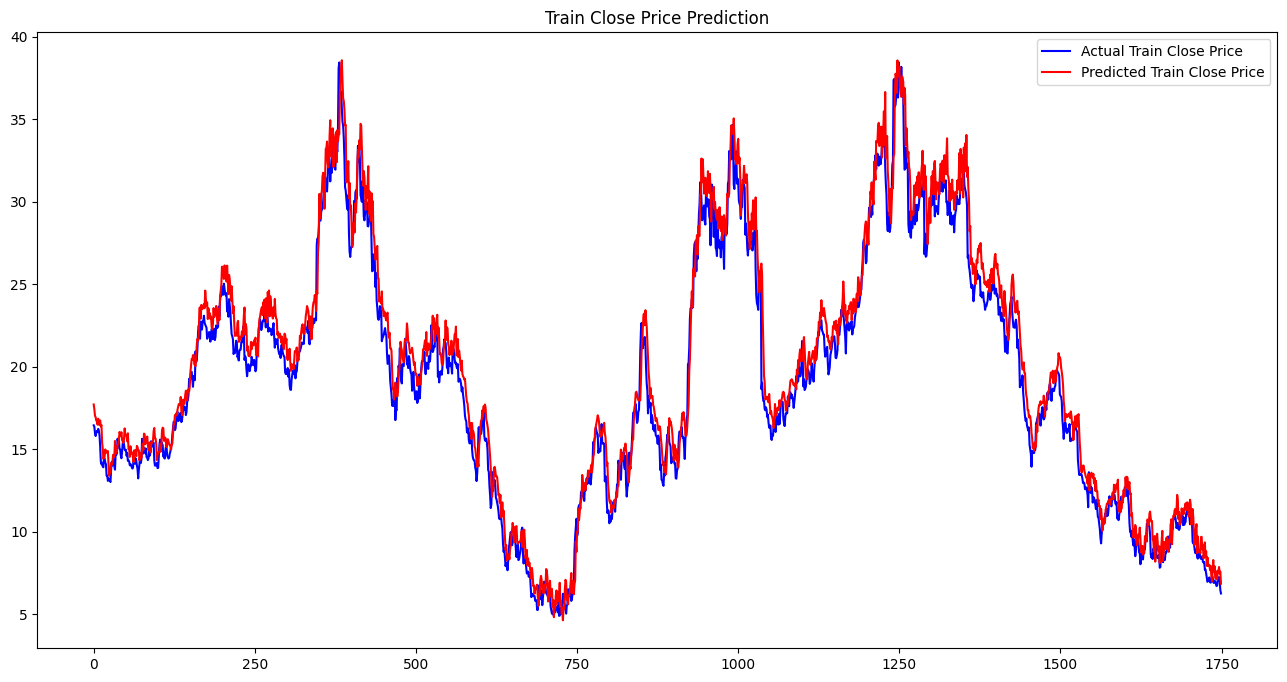

In [62]:
plt.figure(figsize=(16,8))
plt.plot(train_actual, color = 'blue', label = 'Actual Train Close Price')
plt.plot(train_pred, color = 'red', label = 'Predicted Train Close Price')
plt.title('Train Close Price Prediction')
plt.legend()
plt.show()

#### Evaluating the LSTM Model on the testing phase

In [63]:
lstm_model.eval()

testY_pred = lstm_model(testX)

test_actual = pd.DataFrame(scaler.inverse_transform(testY.detach().numpy()))
print(test_actual.head())
test_pred = pd.DataFrame(scaler.inverse_transform(testY_pred.detach().numpy()))
print(test_pred.head())

LSTM_test_RMSE = mean_squared_error(test_pred, test_actual, squared=False)
print()
print(LSTM_train_RMSE)

     0
0 5.42
1 5.32
2 5.58
3 4.90
4 5.28
     0
0 6.44
1 6.12
2 5.89
3 5.79
4 5.70

1.4153415


#### Save the trained model’s learned parameters using the code in the below cell.
It is recommended to save the model's trained parameters instead of the whole model.

In [64]:
save_model_name = "predict_stock_price_lstm_pytorch"
torch.save(lstm_model.state_dict(), save_model_name)

#### Plotting the actual and predicted Close Price in the training phase

Accuracy can be improved by tuning the layers in the LSTM Model.

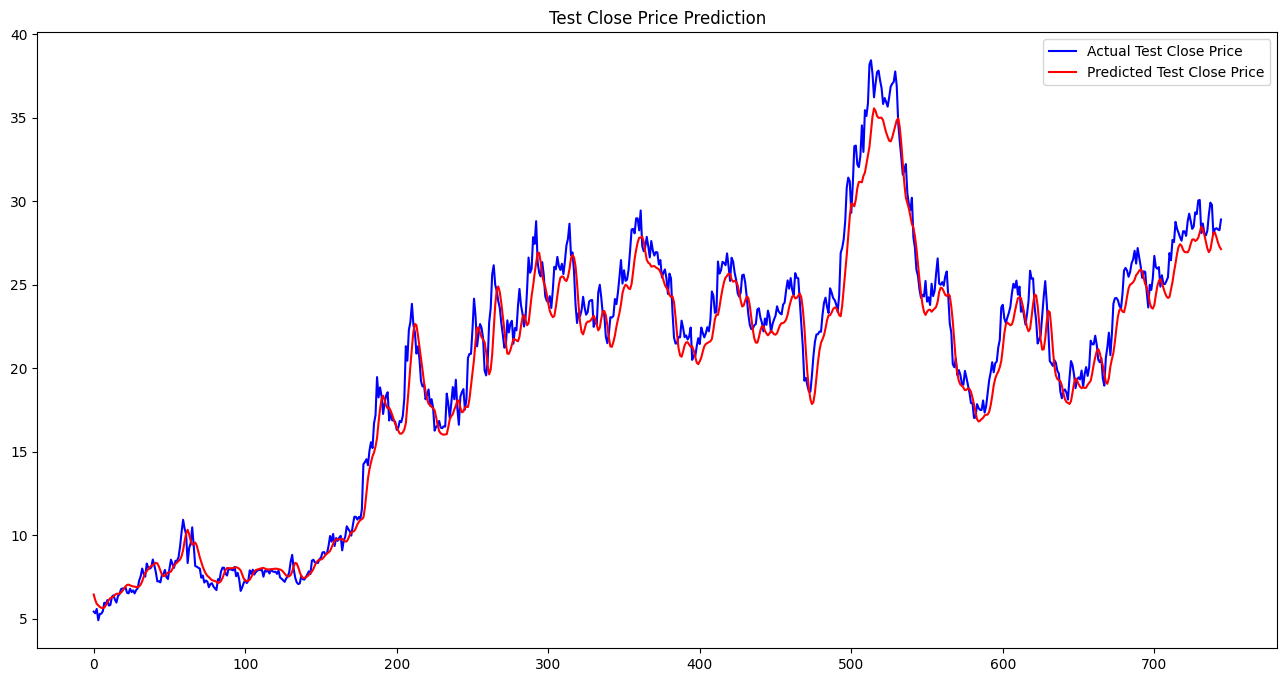

In [65]:
plt.figure(figsize=(16,8))
plt.plot(test_actual, color = 'blue', label = 'Actual Test Close Price')
plt.plot(test_pred, color = 'red', label = 'Predicted Test Close Price')
plt.title('Test Close Price Prediction')
plt.legend()
plt.show()

In [66]:
train_results.append(LSTM_train_RMSE)
test_results.append(LSTM_test_RMSE)
model_names.append("LSTM")

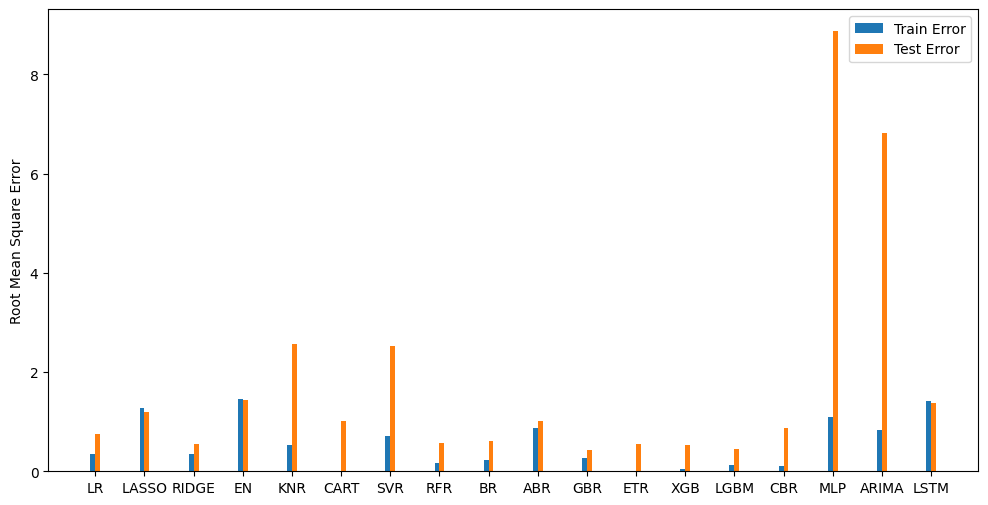

In [67]:
plot_models_RMSE()

#### From the graph above, it can be inferred that LSTM far outperform MLP and ARIMA.